In [33]:
import pandas as pd # import pandas 
import os 
bookings = pd.read_csv("/Users/brindamunuswamy/Desktop/MIS581/h2Features.csv") # read CSV into pandas
bookings.head(15) #reading top 5 rows

,is_canceled,lead_time,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,different_assigned_room
0,0,6,2,1,0.0,0,2,7,4,0,0,0,0,1,0,3,0,0,0
1,1,88,4,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
2,1,65,4,1,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
3,1,92,4,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,2,0
4,1,100,2,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
5,1,79,3,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
6,0,3,3,1,0.0,0,2,5,4,0,0,0,1,1,0,4,0,0,0
7,1,63,3,1,0.0,0,1,6,4,0,0,0,0,1,0,3,0,0,0
8,1,62,3,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
9,1,62,3,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0


In [34]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     79330 non-null  int64  
 1   lead_time                       79330 non-null  int64  
 2   stays_in_week_nights            79330 non-null  int64  
 3   adults                          79330 non-null  int64  
 4   children                        79330 non-null  float64
 5   babies                          79330 non-null  int64  
 6   meal                            79330 non-null  int64  
 7   market_segment                  79330 non-null  int64  
 8   distribution_channel            79330 non-null  int64  
 9   is_repeated_guest               79330 non-null  int64  
 10  previous_cancellations          79330 non-null  int64  
 11  previous_bookings_not_canceled  79330 non-null  int64  
 12  booking_changes                 

In [35]:
bookings['is_canceled'].value_counts() 

0    46228
1    33102
Name: is_canceled, dtype: int64

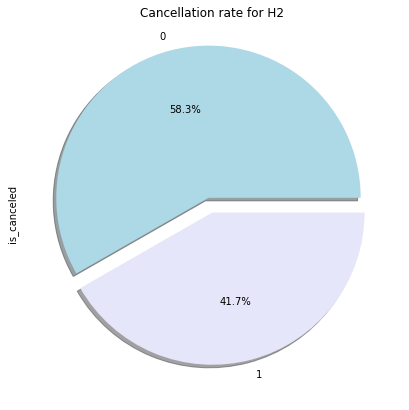

In [31]:
bookings['is_canceled'].value_counts() #benchmark cancellation rate for h2
import matplotlib.pyplot as plt
piedata = bookings['is_canceled'].value_counts()
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2")
plt.show()

In [4]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
X=bookings.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]] 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       79330 non-null  int64  
 1   stays_in_week_nights            79330 non-null  int64  
 2   adults                          79330 non-null  int64  
 3   children                        79326 non-null  float64
 4   babies                          79330 non-null  int64  
 5   meal                            79330 non-null  int64  
 6   market_segment                  79330 non-null  int64  
 7   distribution_channel            79330 non-null  int64  
 8   is_repeated_guest               79330 non-null  int64  
 9   previous_cancellations          79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
 11  booking_changes                 79330 non-null  int64  
 12  deposit_type                    

In [6]:
#df = df.astype({"Column 1": float, "Column 2": int})
#X=X.astype({"adr": int})

In [7]:
Y = bookings.iloc[:,[0]]
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   is_canceled  79330 non-null  int64
dtypes: int64(1)
memory usage: 619.9 KB


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
Y_train['is_canceled'].value_counts()

In [ ]:
Y_test['is_canceled'].value_counts()

In [9]:
import numpy as np
XGBmodel = XGBClassifier(eval_metric='error',use_label_encoder=False)
XGBmodel.fit(X_train, np.ravel(Y_train))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [10]:
Y_pred = XGBmodel.predict(X_test) # Predictions for test data set
predictions = [round(value) for value in Y_pred]

In [11]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.68%


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[12697  1166]
 [ 2717  7219]]


In [13]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87     13863
           1       0.86      0.73      0.79      9936

    accuracy                           0.84     23799
   macro avg       0.84      0.82      0.83     23799
weighted avg       0.84      0.84      0.83     23799



In [14]:
xgb_score = cross_val_score(XGBmodel, X, np.ravel(Y), cv=10, scoring='roc_auc')
print("Mean AUC Score - XGBoost: ", xgb_score.mean())

Mean AUC Score - XGBoost:  0.8561388182484413


In [15]:
df = pd.DataFrame(data=Y_pred, columns=["canceled"])
df['canceled'].value_counts()

0    15414
1     8385
Name: canceled, dtype: int64

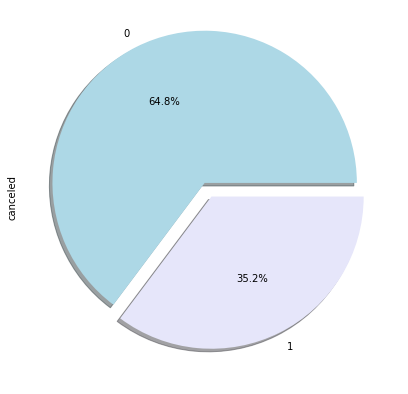

In [16]:
import matplotlib.pyplot as plt
piedata = df['canceled'].value_counts()
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
#plt.title("Pie chart showing total worldwide gross income of movies, by genre")
plt.show() # displaying only chart without the extra information
#benchmark


In [17]:
Y_pred_X = XGBmodel.predict(X) # Predictions for entire data set
predictions = [round(value) for value in Y_pred_X]

In [18]:
accuracy = accuracy_score(Y, predictions) # accuracy for predictions for entire data set 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.25%


In [19]:
print(confusion_matrix(Y, Y_pred_X)) # confusion matrix for predictions for entire data set

[[42562  3666]
 [ 8825 24277]]


In [20]:
print(classification_report(Y, Y_pred_X))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     46228
           1       0.87      0.73      0.80     33102

    accuracy                           0.84     79330
   macro avg       0.85      0.83      0.83     79330
weighted avg       0.85      0.84      0.84     79330



In [21]:
xgb_score = cross_val_score(XGBmodel, X, np.ravel(Y), cv=10, scoring='roc_auc')
print("Mean AUC Score - XGBoost: ", xgb_score.mean())

Mean AUC Score - XGBoost:  0.8561388182484413


In [22]:
df = pd.DataFrame(data=Y_pred_X, columns=["canceled"]) # cancellation rate for entire data set
df['canceled'].value_counts()

0    51387
1    27943
Name: canceled, dtype: int64

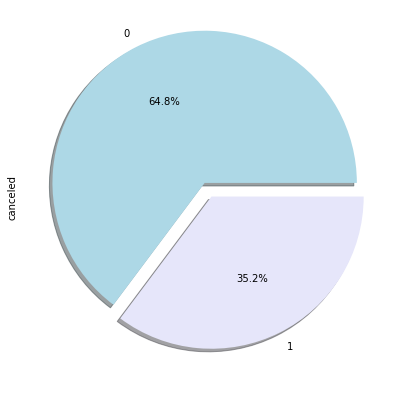

In [23]:
piedata = df['canceled'].value_counts()
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
#plt.title("Pie chart showing total worldwide gross income of movies, by genre")
plt.show() # displaying only chart without the extra information
#benchmark
#0    28938
#1    11122